# Ensemble Methods
Ensemble methods are techniques in machine learning that combine multiple models to produce a superior output compared to outputs from individual models. This approach leverages the strength and diversity of various models to improve predictions and manage issues like overfitting and variance. Ensemble methods are particularly effective for complex problems where a single model's performance might be limited.

##Types of Ensemble Methods
Ensemble methods are broadly categorized into two types: averaging methods and boosting methods. Averaging methods (such as Bagging and Random Forests) involve building several estimators independently and then averaging their predictions. On the other hand, boosting methods (such as AdaBoost and Gradient Boosting) build estimators sequentially, each trying to correct its predecessor.

## Hard Voting
Hard voting is a straightforward ensemble technique used primarily for classification problems. In hard voting, each model in the ensemble votes on the output class, and the class that gets the majority of the votes is chosen as the final prediction. This method is effective because it reduces the likelihood of an erroneous prediction from any single model influencing the overall outcome. The key advantage of hard voting is that it can be used with any set of diverse models, provided they are all classifiers.

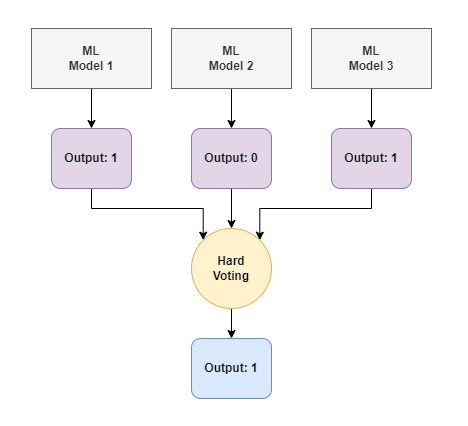




## Bagging
Bagging, or Bootstrap Aggregating, involves training multiple models on different subsets of the original dataset, with replacement. Each model in a bagging ensemble operates independently, and their outputs are averaged (for regression tasks) or majority-voted (for classification tasks) to produce the final result. Bagging is particularly useful with high-variance models like decision trees, where it helps to reduce variance without increasing bias.

### Features of Bagging:
- Reduction in Variance: By averaging several models, the variance of the prediction is reduced.
- Bootstrap Sampling: Each model in the ensemble is trained on a random subset of the data, which helps in making the models less correlated.
Parallel Training: Models in bagging are trained independently, making the process easily parallelizable.

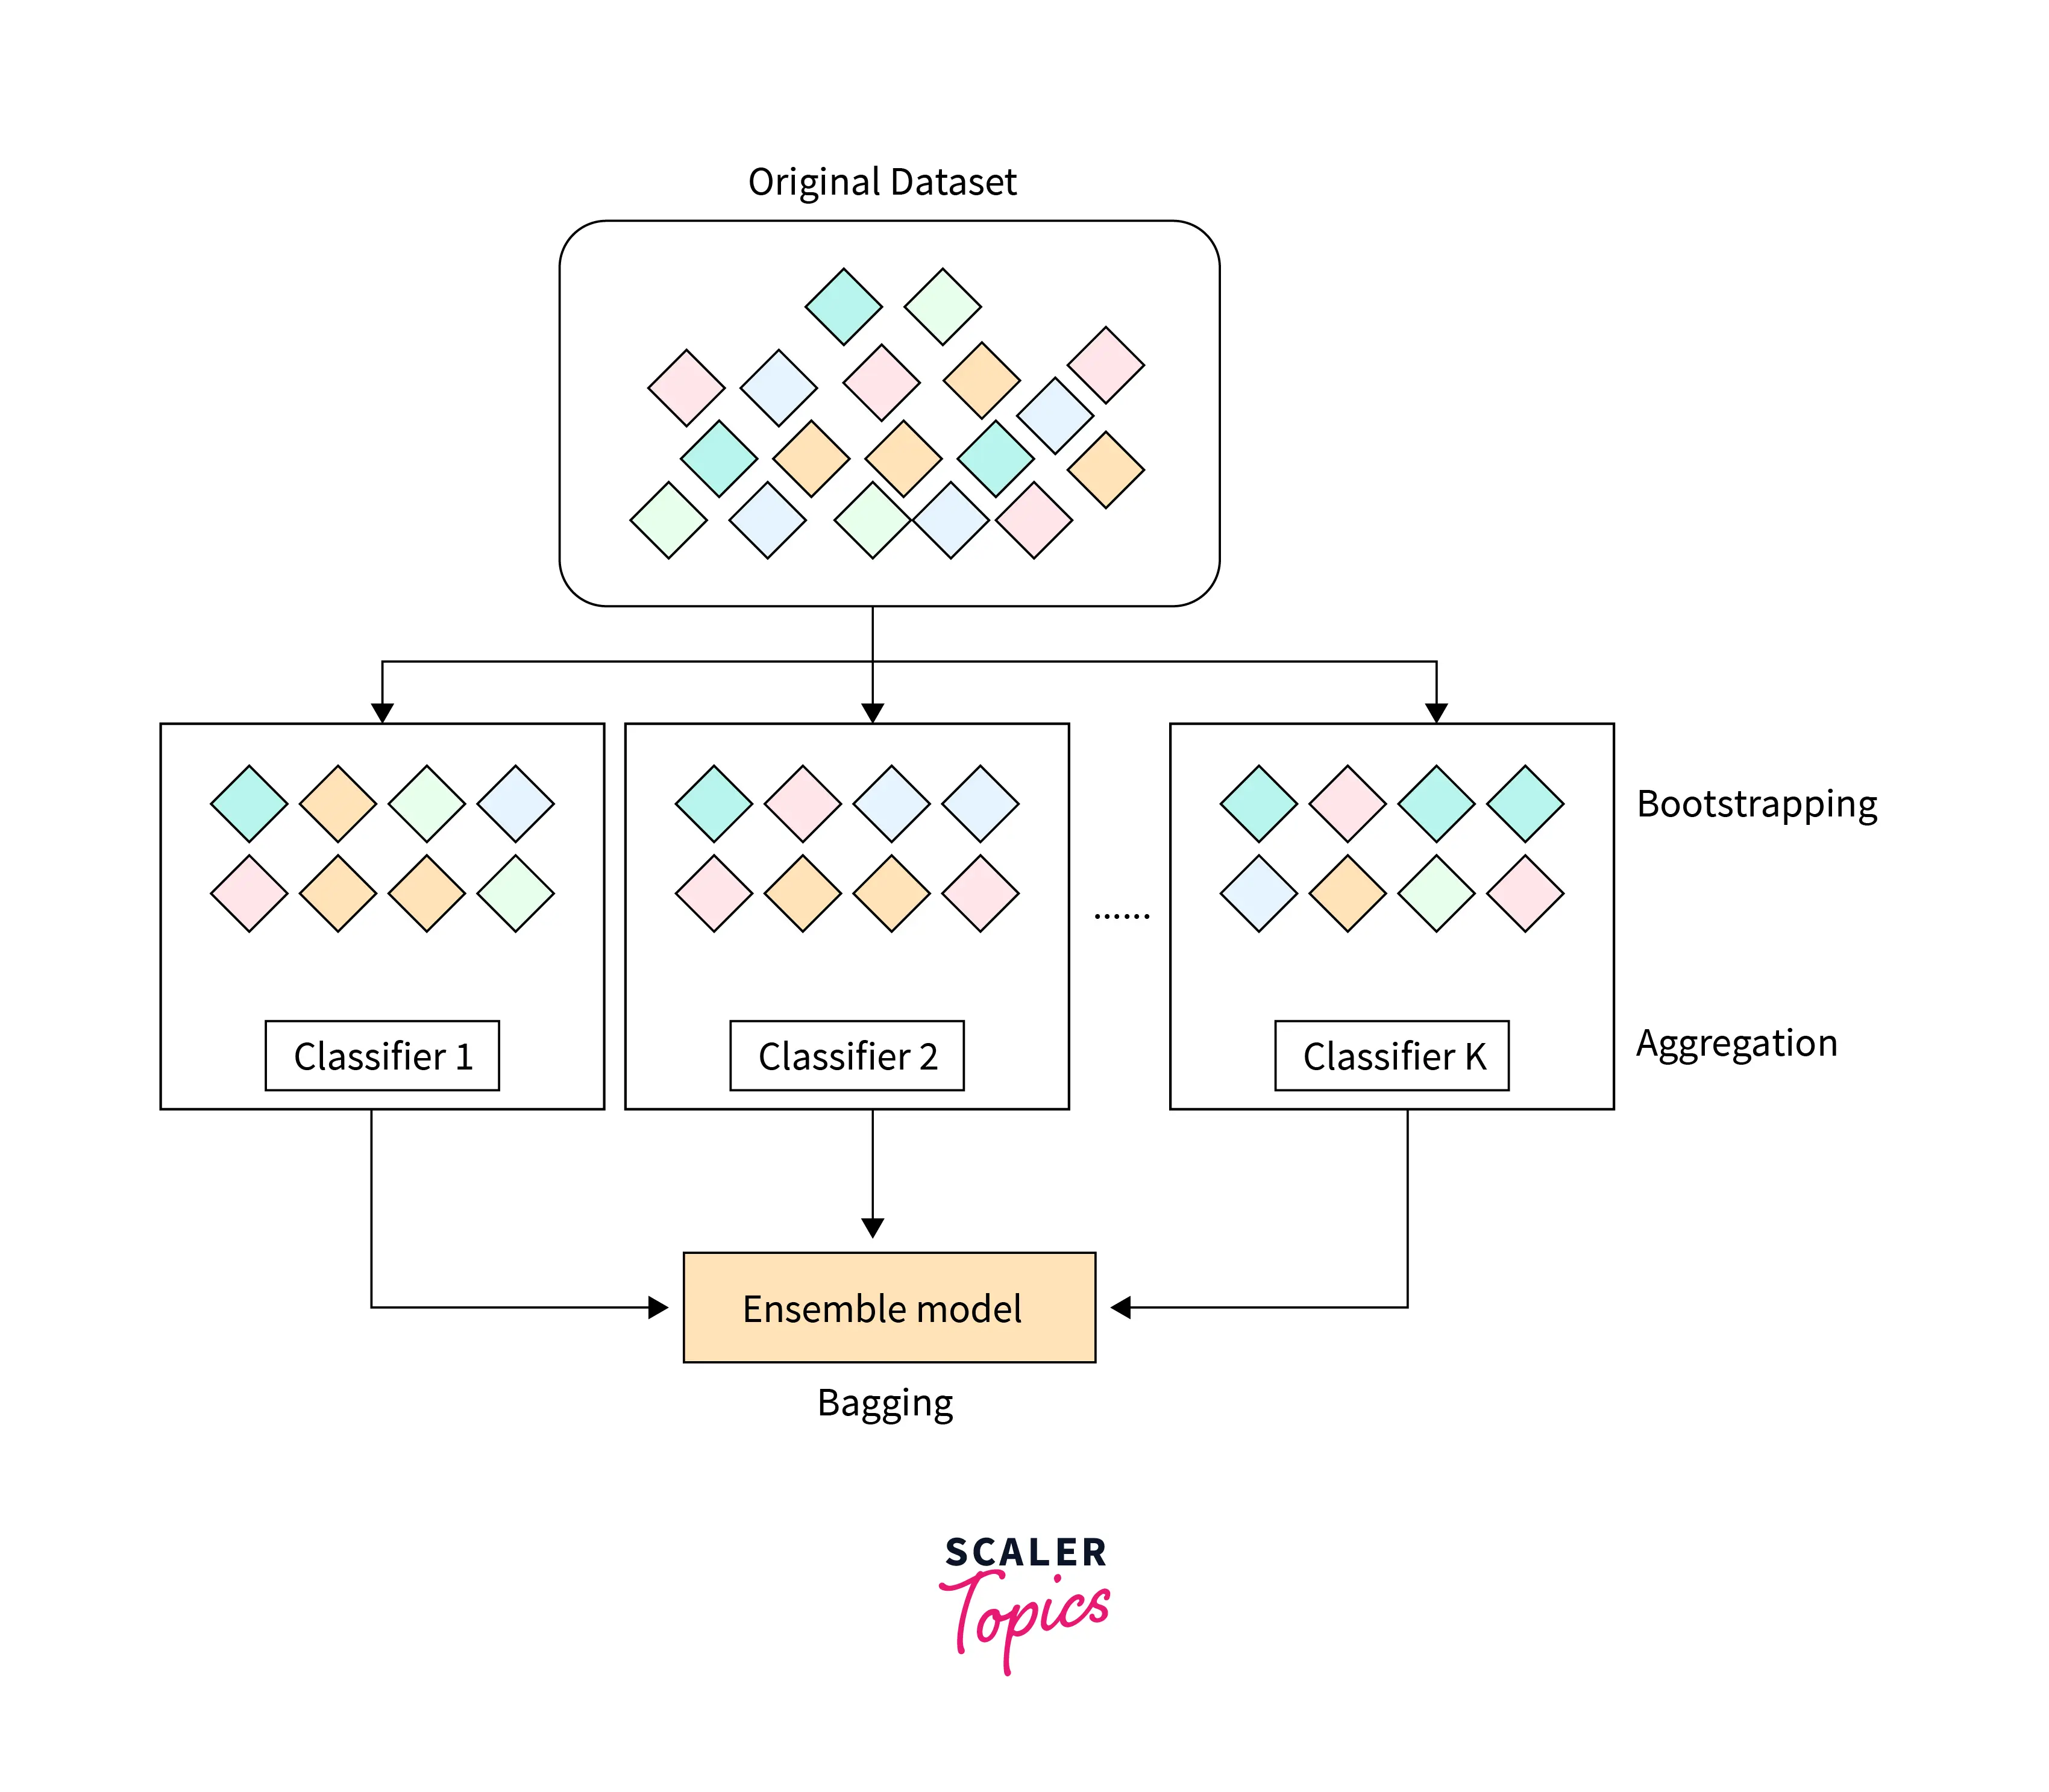

## Random Forest
Random Forest is an extension of the bagging ensemble method applied specifically to decision trees. In a Random Forest, numerous decision trees are trained on various sub-samples of the dataset, but unlike standard bagging, Random Forest introduces another level of randomness by selecting a subset of features at each split in the learning process. This approach not only helps in reducing variance but also in decreasing correlation between the trees in the forest.

### Features of Random Forest:
- Feature Randomness: When building trees, Random Forest uses a random subset of features, which ensures that the trees are diverse and reduces model error due to variance.
- Robustness to Noise: Due to averaging, Random Forests are quite robust to noise and overfitting in the training data.
- Importance of Features: Random Forest can provide insights into the importance of different features for the classification or regression tasks.

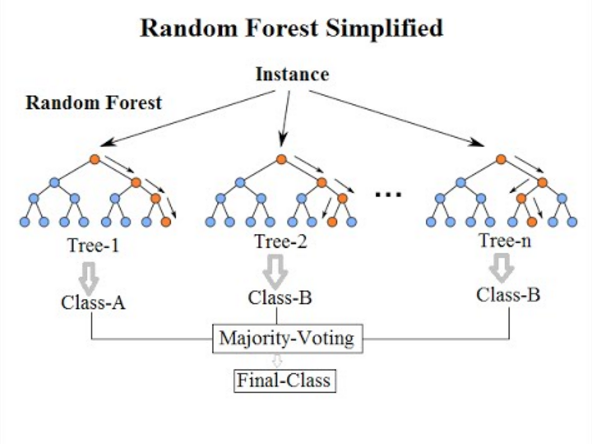

## Application

In this notebook, I will go implement Hard Voting, Bagging, and Random Forest on multiple datasets. We'll observe where each method is most/least effective, and their strengths/weaknesses.

I'll start by implementing Hard Voting on the Census Income Dataset, a notoriously large dataset with a lot of features. Also known to be pretty hard to model.

In [1]:
!pip install ucimlrepo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Fetch dataset
census_income = fetch_ucirepo(id=20)

In [3]:
X = census_income.data.features
y = census_income.data.targets

missing_rows = X.isna().any(axis=1)

# Count the number of rows with at least one missing value
num_missing_rows = missing_rows.sum()

print(f"Number of rows with at least one missing value: {num_missing_rows}")


Number of rows with at least one missing value: 1221


In this dataset, it is missing values in certain rows. However, since we have over 45,000 instances, instead of trying to work with these incomplete rows we can just remove them.

In [4]:
columns_to_check = ['workclass', 'occupation', 'native-country']
na_indices = X[columns_to_check].isna().any(axis=1)

X = X.drop(na_indices[na_indices].index)
y = y.drop(na_indices[na_indices].index)

In [5]:
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    X.loc[:, column] = le.fit_transform(X.loc[:, column])

# If you need the matrix form as numpy arrays
X = X.values
y = y.values
y = np.where(y == '<=50K', 0, 1)
y = y.ravel()

This dataset contains both categorical and continuous features. For the categorical, we have to convert them into integer values, in order for Hard Voting to work correctly. We do this using Label Encoder.

In [6]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
        estimators=[("lr", log_clf), ("dt", dt_clf), ("svm", svm_clf)],
        voting = "hard"
    )

svm_clf.fit(X_train, y_train)
svm_y_predict = svm_clf.predict(X_test)
print(f"svm accuracy: {accuracy_score(y_test, svm_y_predict)}")

log_clf.fit(X_train, y_train)
log_y_predict = log_clf.predict(X_test)
print(f"logistic regression accuracy: {accuracy_score(y_test, log_y_predict)}")

dt_clf.fit(X_train, y_train)
dt_y_predict = dt_clf.predict(X_test)
print(f"decision tree accuracy: {accuracy_score(y_test, dt_y_predict)}")

voting_clf.fit(X_train, y_train)
y_predict = voting_clf.predict(X_test)
print(f"voting classifier accuracy: {accuracy_score(y_test, y_predict)}")

svm accuracy: 0.5612598425196851
logistic regression accuracy: 0.5722834645669291
decision tree accuracy: 0.5984251968503937
voting classifier accuracy: 0.5920209973753281


Here we can see our model was not too great. Perhaps a mix of lack of patterns in the dataset, and the fact that these simple models may not be able to capute the true essence of the Census Income Dataset. Let's see how Hard Voting works on a smaller dataset that has much more identifiable patterns, the Breast Cancer Diagnostic Dataset.

In [61]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

X = X.values
y = y.values
y = np.where(y == 'B', 0, 1)
y = y.ravel()

In [62]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
        estimators=[("lr", log_clf), ("dt", dt_clf), ("svm", svm_clf)],
        voting = "hard"
    )

svm_clf.fit(X_train, y_train)
svm_y_predict = svm_clf.predict(X_test)
print(f"svm accuracy: {accuracy_score(y_test, svm_y_predict)}")

log_clf.fit(X_train, y_train)
log_y_predict = log_clf.predict(X_test)
print(f"logistic regression accuracy: {accuracy_score(y_test, log_y_predict)}")

dt_clf.fit(X_train, y_train)
rnd_y_predict = dt_clf.predict(X_test)
print(f"decision tree accuracy: {accuracy_score(y_test, rnd_y_predict)}")

voting_clf.fit(X_train, y_train)
y_predict = voting_clf.predict(X_test)
print(f"voting classifier accuracy: {accuracy_score(y_test, y_predict)}")

svm accuracy: 0.9473684210526315
logistic regression accuracy: 0.9649122807017544
decision tree accuracy: 0.9473684210526315


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

voting classifier accuracy: 0.9649122807017544


Much better! We can see our model returns 96% accuracy, a big upgrade from 60%. Now we're going to implement Bagging and Random Forest on 2 different datasets, while comparing to the traditional Decision Tree. First up we will continue using the Breast Cancer dataset.

In [63]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the bagging classifier with a Decision Tree as the base estimator
bagging_model = BaggingClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=500,
    bootstrap=True,
    random_state=42
)

# Train the model
bagging_model.fit(X_train, y_train)

# Predict on the test set
y_pred = bagging_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.94


In [64]:
from sklearn.metrics import classification_report
print(f"Bagging Classification Report")
print(classification_report(y_test, y_pred))

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       108
           1       0.95      0.89      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



Here we can see Bagging did pretty well, with an accuracy of 94%. Let's analyze the Confusion Matrix and the ROC-AUC.

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[105   3]
 [  7  56]]


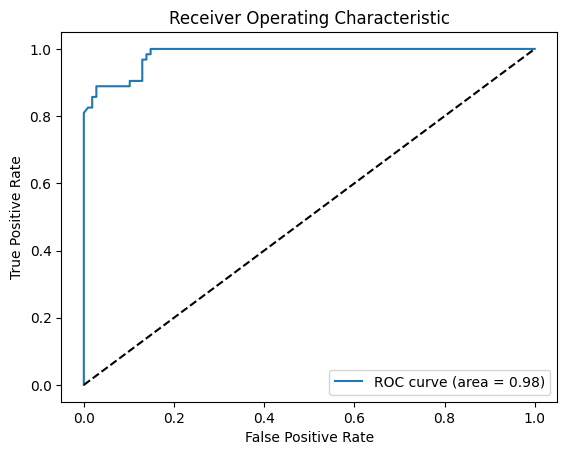

In [66]:
y_probs = bagging_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_probs)
fpr, tpr, _ = roc_curve(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


We can see our model is pretty great. Now we implement two types of the Decision Trees: max depth of 1 (stump tree), and max depth of 6.

In [67]:
tree_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.93      0.90      0.92       108
           1       0.84      0.89      0.86        63

    accuracy                           0.89       171
   macro avg       0.88      0.89      0.89       171
weighted avg       0.90      0.89      0.90       171
 



We can see our Bagging Model outperformed the 'Stump' Decision tree.

In [69]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, tree_y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[97 11]
 [ 7 56]]


In [70]:
better_tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
better_tree_clf.fit(X_train, y_train)
better_tree_y_pred = better_tree_clf.predict(X_test)
print(f"Better Tree Classification Report")
print(classification_report(y_test, better_tree_y_pred), "\n")

Better Tree Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       108
           1       0.94      0.95      0.94        63

    accuracy                           0.96       171
   macro avg       0.95      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171
 



In [71]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, better_tree_y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[104   4]
 [  3  60]]


However, the Decision Tree of max depth = 6 outperformed the bagging model. We could be inclined to say it is the better model, but we are still running the risk of overfitting. Finally, we implement the Random Forest model

In [72]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = forest_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       108
           1       1.00      0.89      0.94        63

    accuracy                           0.96       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.96      0.96       171
 



In [73]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, forest_y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[108   0]
 [  7  56]]


We can see our Random Forest model tied for best accuracy, and also does not run the risk of overfitting. Based on the dataset (large number of continuous features) and the results of all 4 models, we can make a hypothesis that the Random Forest Model is the best way to model large continuous datasets. Another cool thing we can analyze from the Random Forest model is which features were most important in modeling the dataset.

In [75]:
names = ["radius1", "texture1", "perimeter1", "area1", "smoothness1", "compactness1", "concavity1", "concave_points1", "symmetry1",
         "fractal_dimension1", "radius2", "texture2", "perimeter2", "area2", "smoothness2", "compactness2", "concavity2", "concave_points2",
         "symmetry2", "fractal_dimension2", "radius3", "texture3", "perimeter3", "area3", "smoothness3", "compactness3", "concavity3",
         "concave_points3", "symmetry3", "fractal_dimension3"]

feature_importances = zip(names, forest_clf.feature_importances_)
sorted_features = sorted(feature_importances, key=lambda x: x[1], reverse=True)

for name, score in sorted_features[:10]:
    print(name, score)


concave_points1 0.158
perimeter3 0.126
concave_points3 0.124
area3 0.102
radius3 0.1
area1 0.066
radius1 0.056
perimeter1 0.054
concavity1 0.054
concavity3 0.05


Here we have printed the 10 most influential features. Now, we will use a new dataset (Banknote Authorization) with just 2 features, and implement all three models again.

In [87]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
banknote_authentication = fetch_ucirepo(id=267)

# data (as pandas dataframes)
X = banknote_authentication.data.features
y = banknote_authentication.data.targets

X = X[['variance', 'skewness']].values
y = y.values.ravel()

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=1, random_state=42)
tree_clf.fit(X_train, y_train)
tree_y_pred = tree_clf.predict(X_test)
print(f"Tree Classification Report")
print(classification_report(y_test, tree_y_pred), "\n")

Tree Classification Report
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       229
           1       0.80      0.84      0.82       183

    accuracy                           0.84       412
   macro avg       0.84      0.84      0.84       412
weighted avg       0.84      0.84      0.84       412
 



In [90]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

better_tree_clf = DecisionTreeClassifier(max_depth=6, random_state=42)
better_tree_clf.fit(X_train, y_train)
better_tree_y_pred = better_tree_clf.predict(X_test)
print(f"Better Tree Classification Report")
print(classification_report(y_test, better_tree_y_pred), "\n")


Better Tree Classification Report
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       229
           1       0.91      0.91      0.91       183

    accuracy                           0.92       412
   macro avg       0.92      0.92      0.92       412
weighted avg       0.92      0.92      0.92       412
 



Unsurprisingly the more advanced Decision Tree outperformed the Stump Decision Tree.

In [91]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Bagging Classification Report
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       229
           1       0.80      0.84      0.82       183

    accuracy                           0.84       412
   macro avg       0.84      0.84      0.84       412
weighted avg       0.84      0.84      0.84       412
 



Similar to last time the advanced Decision Tree outperformed Bagging. 

What is really unique this time is the Bagging model and Stump model returned the exact same values. We will analyze their decision boundaries, but most likely the models fit the data the exact same way.

In [92]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = forest_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           0       0.84      0.97      0.90       229
           1       0.96      0.77      0.85       183

    accuracy                           0.88       412
   macro avg       0.90      0.87      0.88       412
weighted avg       0.89      0.88      0.88       412
 



This time, Random Forest performed second best instead of first. Now we will see the decision boundaries of all 4 models

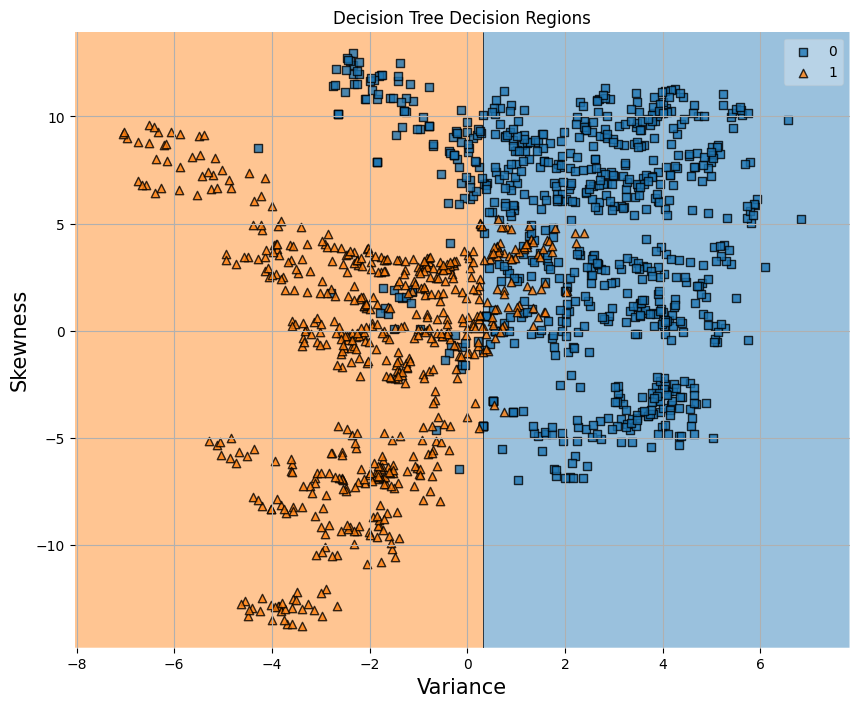

In [93]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plt.title('Decision Tree Decision Regions')
plot_decision_regions(X, y, clf = tree_clf)
plt.xlabel("Variance", fontsize = 15)
plt.ylabel("Skewness", fontsize = 15)
plt.grid()
plt.show()

The Stump DT had a very simple decision boundary model, creating a line of separation when the Variance is a little above 0.

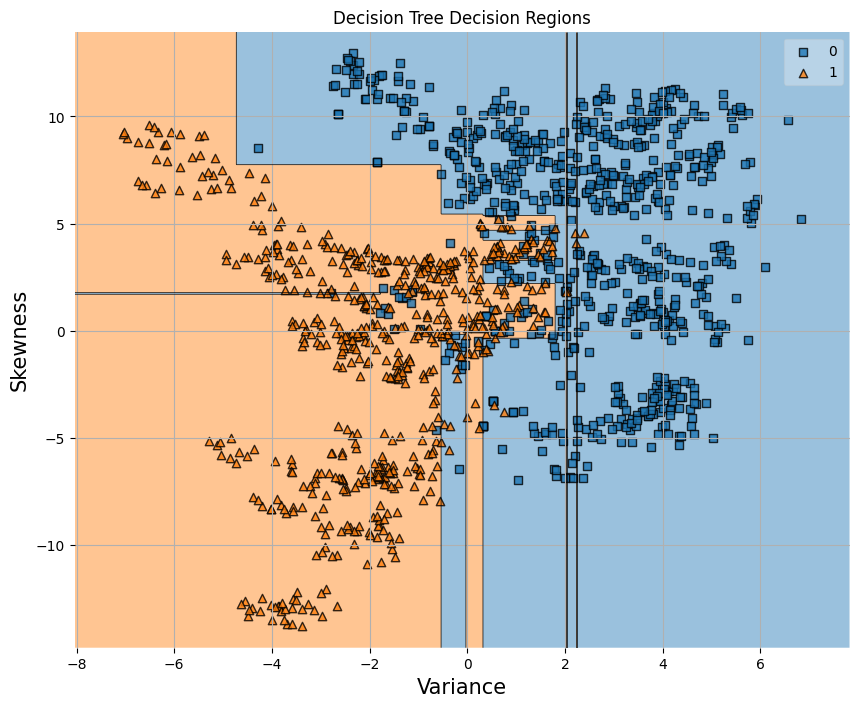

In [94]:
plt.figure(figsize = (10, 8))
plt.title('Decision Tree Decision Regions')
plot_decision_regions(X, y, clf = better_tree_clf)
plt.xlabel("Variance", fontsize = 15)
plt.ylabel("Skewness", fontsize = 15)
plt.grid()
plt.show()

On the other hand, the advanced DT has many decision boundaries. Looking at the graph, we can see that certain boundaries look an awful lot like overfitting. For Example, the two boundaries at the Variance = 2 mark. These were created to account for 3 datapoints which could have easily been outliers.

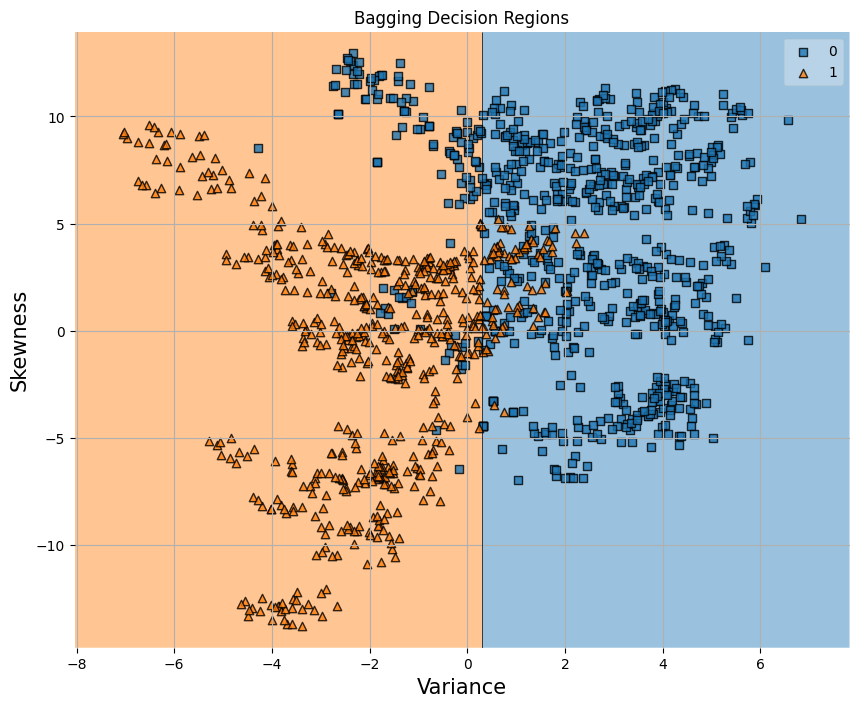

In [95]:
plt.figure(figsize = (10, 8))
plt.title('Bagging Decision Regions')
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("Variance", fontsize = 15)
plt.ylabel("Skewness", fontsize = 15)
plt.grid()
plt.show()

Now we know for sure our Bagging and Stump model are identical. We can infer when there are a low number of features and/or datapoints, Bagging and Stump Decision Trees will often return the same output.

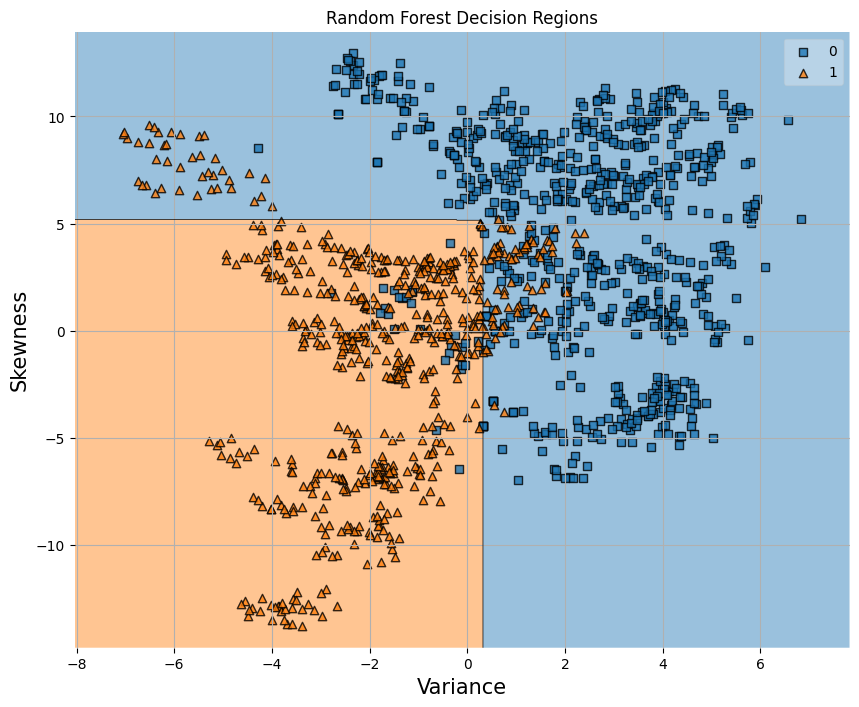

In [96]:
plt.figure(figsize = (10, 8))
plt.title('Random Forest Decision Regions')
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("Variance", fontsize = 15)
plt.ylabel("Skewness", fontsize = 15)
plt.grid()
plt.show()

Our Random Forest model created two decision boundaries. We can infer if we increased the max depth of the Random Forest model, it would create more boundaries and most likely end up being more accurate than the advanced Decision Tree.

## Conclusion

We analyzed numerous Ensemble methods, and the results were very exciting. Hard Voting does not perform well with complex data sets, Bagging and Stump Decision Trees can create the same model when given simple datasets, and Random Forest models are extremely powerful. For our last dataset, it is also safe to assume our best bet is a Random Forest model with max depth ~ 3, so that it can create more precise boundaries but does not overfit.